1. Basit/Çoklu Doğrusal Regresyon:
- En temel ve yaygın model
- Artıları: Yorumlanabilirlik, basitlik
- Eksiler: Doğrusal ilişki varsayımı, aykırı değerlere hassasiyet
- Kullanım: İlişkiler doğrusalsa ve veri temizse

2. Ridge Regresyon:
- Önem: ⭐⭐⭐⭐
- Çoklu bağlantı (multicollinearity) sorununu çözer
- Artılar: Değişkenleri modelden çıkarmaz, overfitting'i azaltır
- Eksiler: Değişken seçimi yapmaz
- Kullanım: Değişkenler arasında yüksek korelasyon varsa

3. Lasso Regresyon:
- Önem: ⭐⭐⭐⭐
- Değişken seçimi yapar
- Artılar: Önemsiz değişkenleri eler
- Eksiler: Çok sayıda değişken varsa kararsız olabilir
- Kullanım: Değişken seçimi gerekiyorsa

4. ElasticNet:
- Önem: ⭐⭐⭐
- Ridge ve Lasso'nun birleşimi
- Artılar: Her iki modelin avantajlarını birleştirir
- Eksiler: İki hyperparameter ayarı gerekir
- Kullanım: Ridge/Lasso arasında kararsız kalındığında

5. PCR (Temel Bileşen Regresyonu):
- Önem: ⭐⭐⭐
- Boyut azaltma + regresyon
- Artılar: Çoklu bağlantıyı çözer
- Eksiler: Yorumlanması zor
- Kullanım: Yüksek boyutlu veride

6. PLS (Partial Least Squares):
- Önem: ⭐⭐⭐
- PCR'ye benzer ama bağımlı değişkeni de hesaba katar
- Artılar: Tahmin gücü yüksek
- Eksiler: Yorumlanması zor
- Kullanım: Yüksek boyutlu, çoklu bağlantılı veri

Bahsedilmeyen Modeller:
- Polynomial Regresyon
- Quantile Regresyon
- Robust Regresyon
- GAM (Generalized Additive Models)
- Support Vector Regression
- Decision Tree Regression

Kullanım Sıralaması:
1. Basit/Çoklu Doğrusal Regresyon (baseline model)
2. Ridge/Lasso (regularization gerekiyorsa)
3. ElasticNet (Ridge/Lasso kararsızsa)
4. PCR/PLS (yüksek boyutlu veri)

Basit bir şekilde açıklayayım:

1. Basit/Çoklu Doğrusal Regresyon:
- İlk olarak bunu dene
- Veriler düzgün ve değişkenler arasında güçlü ilişki yoksa
- Örnek: Ev fiyatı tahmini (alan, oda sayısı gibi net değişkenlerle)

2. Ridge Regresyon Kullan:
- Değişkenler arasında yüksek ilişki varsa
- Tüm değişkenleri modelde tutmak istiyorsan
- Örnek: Genetik veri analizi (birçok gen birbiriyle ilişkili)

3. Lasso Regresyon Kullan:
- Çok fazla değişken var ve hangilerinin önemli olduğunu bilmiyorsan
- Değişken seçimi yapmak istiyorsan
- Örnek: Müşteri davranışı tahmini (birçok özellikten hangilerinin etkili olduğunu bulmak)

4. ElasticNet Kullan:
- Ridge ve Lasso arasında karar veremiyorsan
- Hem değişken seçimi hem de yüksek ilişkili değişkenler varsa
- Örnek: Borsa tahmini (birçok ilişkili ekonomik gösterge var)

5. PCR Kullan:
- Çok yüksek boyutlu verin varsa
- Değişkenler arası ilişki çok yüksekse
- Örnek: Görüntü işleme, spektral veri analizi

6. PLS Kullan:
- PCR'ye benzer durumlar ama tahmin performansı daha önemliyse
- Örnek: Kimyasal süreç kontrolü, spektroskopi

Pratik Örnek:
- Eğer ev fiyatı tahmini yapıyorsan:
  * Önce Doğrusal Regresyon dene
  * Değişkenler arası ilişki yüksekse Ridge'e geç
  * Çok fazla gereksiz değişken varsa Lasso kullan
  * Hala kararsızsan ElasticNet dene

![image.png](image1.png)

Doğrusallıkta kalmak bizlere daha çok yorumlanabilirlik şansı vermektedir. Yorumlanabilirlik açısından en zengin modeller bu modellerdir.

# Basit Doğrusal Regresyon

Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

![image.png](image2.png)

x, bağımsız değişkenleri temsil eder. y, bağımlı değişkeni temsil eder. Buradaki ß modele göre optimum seviyeye getirilir. Epsilon işareti ise hata payını verir. (Stokastik model formulü)

![image.png](image3.png)

![image.png](image4.png)

![image.png](image5.png)

![image.png](image6.png)

## Uygulama

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:, 1:len(df)] # index'i sutun olarak aldigi icin
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any() # degerlerde hic eksik deger yok

False

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
import seaborn as sns

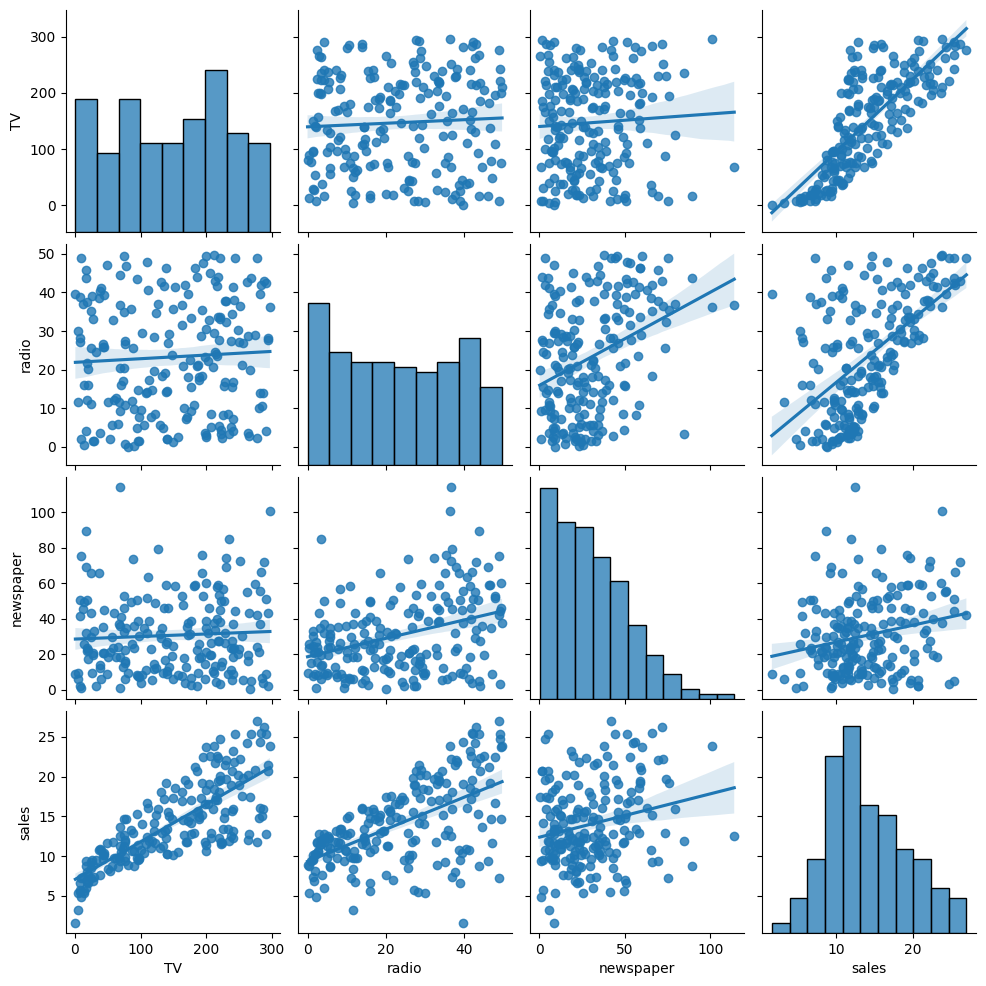

In [8]:
sns.pairplot(data=df, kind='reg');

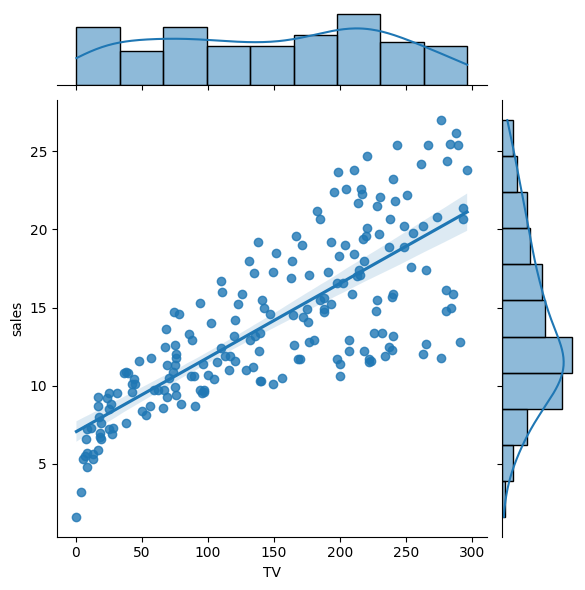

In [9]:
sns.jointplot(x='TV', y='sales', data=df, kind='reg')

TV ve radio arasındaki korelasyon çok düşük. Bundan dolayı tv yi sales modelini modellemek için kullanmakla beraber radio değişkenini DE kullanabiliriz.

## Statsmodels ile modelleme

In [10]:
!pip install statsmodels

In [11]:
import statsmodels.api as sm

X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)

In [13]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df[['sales']]
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [15]:
lm = sm.OLS(y, X)

In [16]:
model = lm.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        17:17:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![image.png](image7.png)

Kısacası, bu model satışlardaki değişkenliğin %61.2’sini açıklayabiliyor. R kare, formulü gereği değişken arttıkça artacaktır. O yüzden Düzeltilmiş R kare daha düzgün bir metrik olarak karşımıza çıkar.

Kısacası burada, hedef ile ilişkisi yüksek olan bir değişken bulduk(TV) ve bu değişkeni feature variable olarak alıp target variable(sales) ile modele soktuk. Scikit-learn kadar geniş çaplı bir kütüphane olmasa da scikit-learn den daha ayrıntılı bilgi vermektedir.

![image.png](image8.png)

![image.png](image9.png)

Bu değerlere bakacak olursak 'y = ß0 + x*ß1' denklemine göre coef (coefficients) katsayıları verir.

const-coef ve TV-coef:  
* 7.0326 değeri bize ß0'ı ifade ediyor. Yani hiç televizyon harcaması yapılmadığında elde edeceğimiz satıştan bahsediyor.
* 0.0475 ise 1 birim televizyon harcaması yaptığımızda elde edeceğimiz satışın formülize edilmiş halidir.

Standart hata (0.458):  
* Katsayının tahminindeki hata miktarını gösterir. Daha düşük standart hata, tahminin daha güvenilir olduğunu ifade eder.

t-istatistiği (15.360) ve p-değeri (0.000):  
* Sabit terimin anlamlı olup olmadığını test eder. Burada, p-değeri 0.05'ten küçük olduğu için sabit terim istatistiksel olarak anlamlıdır.

[6.130, 7.935]:  
* Bu güven aralığı, tekrar tekrar örnekleme yaparsak oluşturulan güven aralıklarının %95'inin gerçek parametreyi kapsayacağını gösterir

ve sonuç olarak denklemimiz y = 7.0326 + 0.0475*x olur. Bu denklemi kullanarak yeni değerler tahmin ederiz.  
* Makine öğrenmesi sadece model kurup değerlendirmekten ibaret değildir. Bu matematiksel yorumlara dikkat etmek domain knowledge anlamında bizi çok öne geçirir.

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        17:17:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params # bu kullanim direkt katsayilari veriyor

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
model.summary().tables[1] # 2. tabloyu verir.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
model.conf_int() 

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [22]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [23]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [24]:
print("tvalue: ", "%.2f" % model.tvalues[0])

tvalue:  15.36


C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_9424\4239432737.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("tvalue: ", "%.2f" % model.tvalues[0])


In [25]:
model.mse_model  # mse_model fonksiyonu SSE/p yi verir. Burada p bağımsız değişken sayısı

3314.6181668686486

In [26]:
model.mse_resid  # mse_resid ise SSE/n yi verir. n = gözlem sayısı. Yani gerçek mse

10.618841328946221

In [27]:
model.ssr  # sum of squared residuals (toplam hata kareleri)

2102.5305831313517

Kısacası modeli falan kurduk ama modelin doğruluğuna yönelik istatistiksel çıkarımları da ele almalıyız.

In [28]:
model.rsquared

0.611875050850071

In [29]:
model.rsquared_adj

0.6099148238341623

In [30]:
model.fittedvalues[0:5] # modelin tahmin ettigi degerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [31]:
y[0:5] # modelin gercek degerleri

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [32]:
# Bu modelin denklemini yazalim(mulakat sorusu!!)

In [33]:
print("Sales = " + str("%.2f" % model.params.iloc[0]) + " + TV" + " * " + str("%.2f" % model.params.iloc[1]))

Sales = 7.03 + TV * 0.05


In [34]:
print("Sales = {:.2f} + TV * {:.2f}".format(model.params.iloc[0], model.params.iloc[1]))

Sales = 7.03 + TV * 0.05


Diyelim ki satış müdürü bize diyecek: ben TV reklamları için 10 bin dolar ayırdım. Bunun satışa etkisi ne olur? dicek. Biz de oluşturduğumuz bu modelde yerine koycaz:

In [35]:
print(7.03 + 10000*0.05) # dicez

507.03


NameError: name 'plt' is not defined

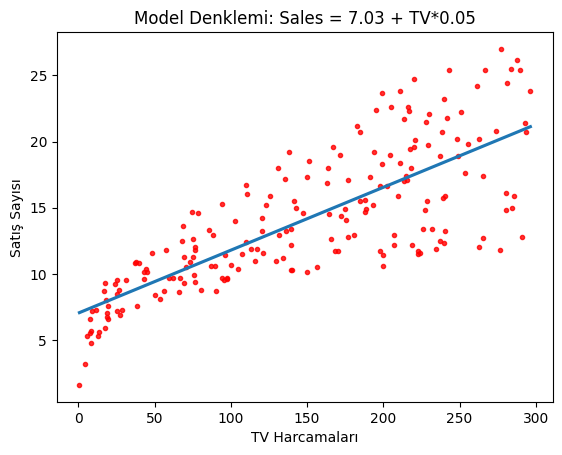

In [36]:
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

## Sklearn ile modelleme

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = df[['TV']]
y = df[['sales']]
reg = LinearRegression() # artik anlasilmistir fakat yine hatirlatayim: once linear regression dan nesne olusturuyoruz. sonra modeli olusturuyoruz
model = reg.fit(X, y)

In [39]:
model.intercept_ # ß0 katsayisini verir.

array([7.03259355])

In [40]:
model.coef_ # ß1 katsayisini verir.

array([[0.04753664]])

In [41]:
model.score(X, y) # basari orani degil, r kare degeridir

0.611875050850071

In [42]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

### Tahmin

Model denklemi:
Sales = 7.03 + TV * 0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [43]:
model.predict([[30]])

C:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8.45869276]])

#### **Niye İki Kere Köşeli Parantez Koyduk?**
Bunun sebebi **Scikit-Learn’un giriş verisini bir 2D (iki boyutlu) array formatında beklemesi**.  

Scikit-Learn modelleri giriş olarak **n örnek × m özellik** şeklinde bir matris bekler:  
- `[30]` → (1,) → **Hatalı format**  
- `[[30]]` → (1,1) → **Doğru format**  

In [44]:
model.predict(pd.DataFrame([[30], [50], [100]], columns=['TV']))

array([[ 8.45869276],
       [ 9.40942557],
       [11.78625759]])